# Sales Prediction

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
advertising = pd.DataFrame(pd.read_csv("Data/simple_lr_application/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

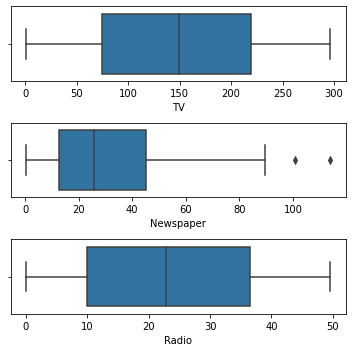

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [8]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

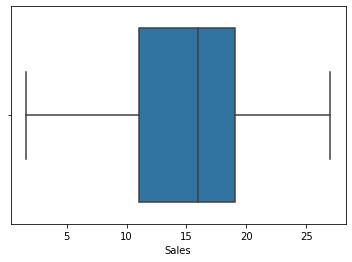

In [9]:
sns.boxplot(advertising['Sales'])
plt.show()

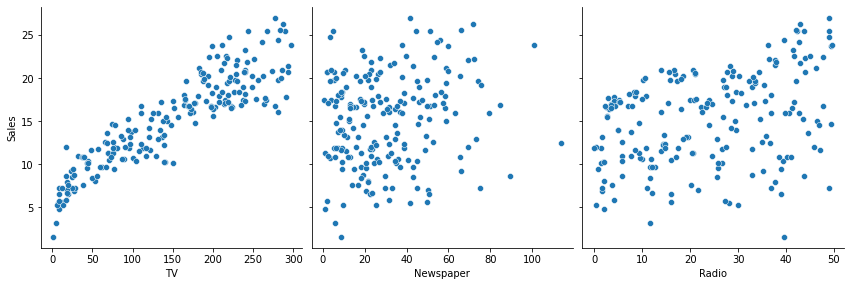

In [10]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

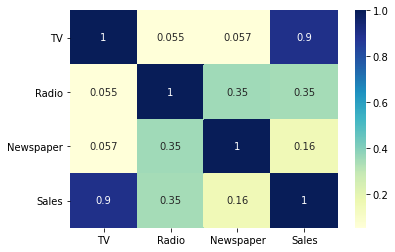

In [11]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [12]:
X = advertising['TV'].values
y = advertising['Sales'].values

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [14]:
# Let's now take a look at the train dataset

X_train[:10]

array([163.5, 100.4,  76.3, 184.9, 134.3, 273.7, 296.4,  96.2, 109.8,
       255.4])

In [15]:
y_train[:10]

array([18. , 10.7, 12. , 20.7, 14. , 20.8, 23.8, 12.3, 16.7, 19.8])

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [16]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

print(f"Accuracy Score is: {regressor.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))}")

Accuracy Score is: 0.8102244046579714


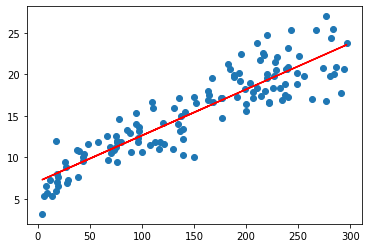

In [17]:
y_train_predicted = regressor.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_predicted, 'r')
plt.show()

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [18]:
y_pred = regressor.predict(X_test.reshape(-1, 1))

In [19]:
y_pred[:10]

array([[10.93411499],
       [ 9.86759305],
       [12.11173297],
       [23.18245294],
       [16.5444648 ],
       [10.21199076],
       [ 7.57345991],
       [20.42727125],
       [ 8.41223498],
       [18.06648049]])

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [21]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

0.8098217586627827

##### Visualizing the fit on the test set

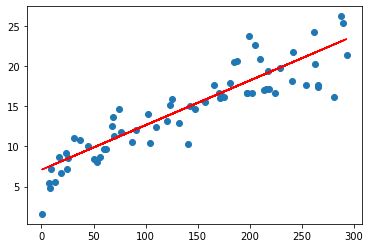

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

## Individual Prediction

In [23]:
TV_commercial = 100

In [26]:
req_inp = np.array(TV_commercial).reshape(-1, 1)
output = regressor.predict(req_inp)

output

array([[12.64499394]])

SyntaxError: invalid syntax (<ipython-input-25-4b37ef281455>, line 1)